In [37]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential # To build the neural network model.

from tensorflow.keras.layers import Flatten, Conv2D, MaxPool2D, Dense, ZeroPadding2D, Dropout
#  Layers from `tensorflow.keras.layers`:
#   - `Flatten`: To flatten the input.
#   - `Conv2D`: For convolutional layers.
#   - `MaxPool2D`: For max pooling layers.
#   - `Dense`: For fully connected layers. 
#   - `ZeroPadding2D`: To pad the input.
#   - `Dropout`: For dropout layers to prevent overfitting.

from tensorflow.keras.utils import to_categorical #To convert labels to categorical data.
from tensorflow.keras.datasets import fashion_mnist #To load the Fashion MNIST dataset.

In [82]:
def load_mnist(path, kind='train'):
    import os
    import gzip # For reading compressed files.
    import numpy as np

    """Load MNIST data from `path`"""
    labels_path = os.path.join(path,
                               '%s-labels-idx1-ubyte.gz'
                               % kind) # Creates the filename by inserting the kind string.
    images_path = os.path.join(path,
                               '%s-images-idx3-ubyte.gz'
                               % kind)

    with gzip.open(labels_path, 'rb') as lbpath:
        labels = np.frombuffer(lbpath.read(), dtype=np.uint8,
                               offset=8)

    with gzip.open(images_path, 'rb') as imgpath:
        images = np.frombuffer(imgpath.read(), dtype=np.uint8,
                               offset=16).reshape(len(labels), 784)

    return images, labels

In [98]:
X_train, y_train = load_mnist('fashionmnist', kind='train')
X_test, y_test = load_mnist('fashionmnist', kind='t10k')

In [99]:
X_train.shape

(60000, 784)

In [100]:
X_test.shape

(10000, 784)

In [101]:
X_train = X_train.reshape(X_train.shape[0], 28, 28)
X_test = X_test.reshape(X_test.shape[0], 28, 28)

In [102]:
X_train.shape

(60000, 28, 28)

In [103]:
X_test.shape

(10000, 28, 28)

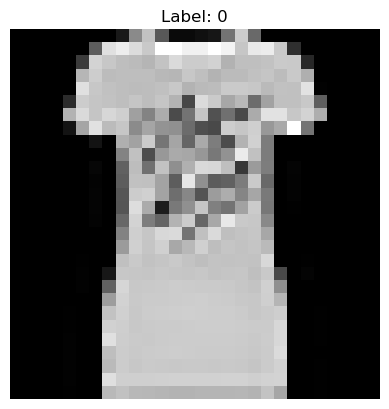

In [104]:
# Display a random image from the dataset

random_index = np.random.randint(0, X_train.shape[0])

plt.imshow(X_train[random_index], cmap='gray')
plt.title(f'Label: {y_train[random_index]}')
plt.axis('off')  # Hide the axes
plt.show()

- `np.expand_dims(X_train, axis=3)`: Adds a new dimension at index 3 to the X_train array.
- This extra dimension represents the number of color channels (1 for grayscale images).

Adding this extra dimension ensures that the input data is in the correct format for CNN layers, which typically expect a 4D tensor with dimensions `(batch_size, height, width, channels)`. This allows the model to correctly process the images during training and inference.

In [105]:
X_train = np.expand_dims(X_train, axis=3)
X_test = np.expand_dims(X_test, axis=3)

In [106]:
X_train.shape

(60000, 28, 28, 1)

In [107]:
#X_train[1000]

**Purpose of Normalization:**
- `Range Normalization`: Pixel values in the original images range from 0 to 255. By dividing by 255.0, the pixel values are scaled to a range of 0 to 1.

- `Improved Model Performance`: Normalizing the pixel values often leads to better performance and faster convergence during the training of neural networks. It helps in stabilizing the learning process.

In [108]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [12]:
model = Sequential([
    ZeroPadding2D(padding=(1, 1), input_shape=(28, 28, 1)),
    Conv2D(32, 3, activation='relu'),
    Dropout(0.2),
    MaxPool2D(pool_size=2, strides=2),
    ZeroPadding2D(padding=(1, 1)),
    Conv2D(64, 3, activation='relu'),
    Dropout(0.2),
    MaxPool2D(pool_size=2, strides=2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax'),
])
model.summary()

C:\Users\amir\anaconda3\Lib\site-packages\keras\src\layers\reshaping\zero_padding2d.py:72: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ zero_padding2d (ZeroPadding2D)  │ (None, 30, 30, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 28, 28, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ zero_padding2d_1                │ (None, 16, 16, 32)     │             0 │
│ (ZeroPadding2D)                 │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 14, 14, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 3136)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       401,536 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 421,642 (1.61 MB)

 Trainable params: 421,642 (1.61 MB)

 Non-trainable params: 0 (0.00 B)

In [109]:
model.compile('adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [110]:
# Converts the labels to one-hot encoded format
y_train_ohe = to_categorical(y_train)
y_test_ohe = to_categorical(y_test)

**Purpose of One-Hot Encoding:**
   - **One-Hot Encoding:** Transforms categorical labels into a binary matrix representation. Each label is represented as a vector with a length equal to the number of classes. For example, if there are 10 classes, the label 3 would be represented as `[0, 0, 0, 1, 0, 0, 0, 0, 0, 0]`.
   - **Benefits:**
       - **Compatibility:** Many machine learning algorithms, including neural networks, work better with one-hot encoded labels as they require the target to be in a specific format.
       - **Avoid Ordinality:** Ensures that the model does not assume any ordinal relationship between the classes.

In [15]:
history = model.fit(X_train, y_train_ohe, epochs=5, validation_data=(X_test, y_test_ohe), batch_size=300)

Epoch 1/5
200/200 ━━━━━━━━━━━━━━━━━━━━ 43s 197ms/step - accuracy: 0.6600 - loss: 0.9565 - val_accuracy: 0.8545 - val_loss: 0.4342
Epoch 2/5
200/200 ━━━━━━━━━━━━━━━━━━━━ 39s 196ms/step - accuracy: 0.8494 - loss: 0.4297 - val_accuracy: 0.8750 - val_loss: 0.3640
Epoch 3/5
200/200 ━━━━━━━━━━━━━━━━━━━━ 38s 191ms/step - accuracy: 0.8694 - loss: 0.3660 - val_accuracy: 0.8843 - val_loss: 0.3277
Epoch 4/5
200/200 ━━━━━━━━━━━━━━━━━━━━ 39s 193ms/step - accuracy: 0.8806 - loss: 0.3322 - val_accuracy: 0.8913 - val_loss: 0.3044
Epoch 5/5
200/200 ━━━━━━━━━━━━━━━━━━━━ 38s 192ms/step - accuracy: 0.8894 - loss: 0.3117 - val_accuracy: 0.8990 - val_loss: 0.2881


<Axes: >

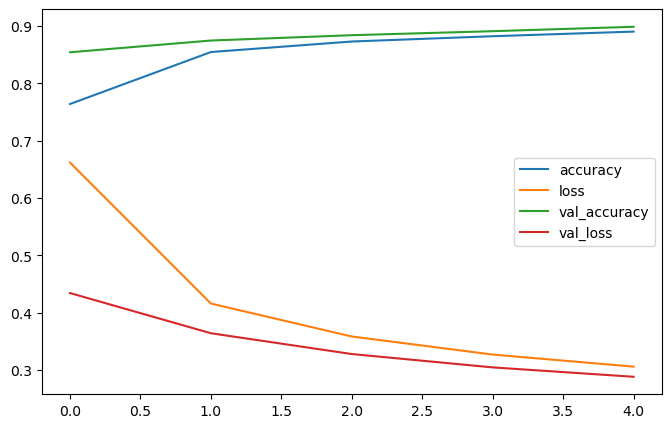

In [16]:
import pandas as pd
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'
pd.DataFrame(history.history).plot(figsize=(8,5))

1. **Import Libraries:**
   - `import pandas as pd`: Imports the pandas library for data manipulation and analysis.
   - `import os`: Imports the os library for interacting with the operating system.

2. **Set Environment Variable:**
   - `os.environ['KMP_DUPLICATE_LIB_OK']='True'`: Sets an environment variable to avoid potential issues related to multiple copies of OpenMP runtime being loaded.

3. **Plot Training History:**
   - `pd.DataFrame(history.history).plot(figsize=(8,5))`: Converts the training history (stored in `history.history`) to a pandas DataFrame and plots it.
     - `history.history` contains the loss and accuracy for both training and validation sets for each epoch.
     - `figsize=(8,5)`: Specifies the size of the plot.

### Purpose:
- **Visualize Training Progress:** The plot provides a visual representation of the model's performance over epochs, showing how the training and validation loss and accuracy evolve. This helps in diagnosing issues like overfitting or underfitting.



In [17]:
history.history

{'accuracy': [0.7641833424568176,
  0.8549166917800903,
  0.873283326625824,
  0.8824999928474426,
  0.8906000256538391],
 'loss': [0.661910355091095,
  0.41587865352630615,
  0.35836273431777954,
  0.32683268189430237,
  0.3057595491409302],
 'val_accuracy': [0.8544999957084656,
  0.875,
  0.8842999935150146,
  0.8913000226020813,
  0.8989999890327454],
 'val_loss': [0.4341864287853241,
  0.3640449345111847,
  0.3277495503425598,
  0.30443716049194336,
  0.2880638837814331]}

 Saving the model allows you to reuse it later without retraining. This is useful for deploying the model, sharing it with others, or simply storing it for future use.

In [18]:
model.save('masoud.h5')

In [111]:
# assuming we have a new image

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step
True label: Pullover
Predicted class: Pullover


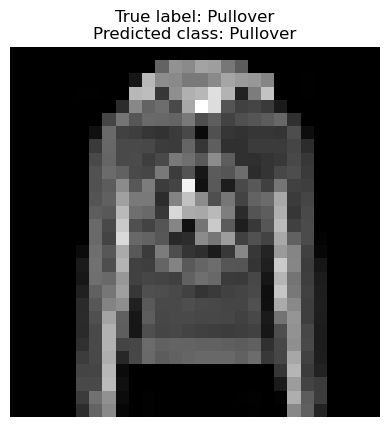

In [133]:
from tensorflow.keras.models import load_model

# Load the model
model = load_model('masoud.h5')

# Select a random image from the test set
random_index = np.random.randint(0, X_test.shape[0])
test_image = X_test[random_index]
test_label = y_test[random_index]

# Preprocess the selected test image
test_image_expanded = np.expand_dims(test_image, axis=0)  # Add batch dimension

# Make predictions
predictions = model.predict(test_image_expanded)

# Get the predicted class
predicted_class = np.argmax(predictions, axis=1)

# Map the predicted class to the class name
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

print(f'True label: {class_names[test_label]}')
print(f'Predicted class: {class_names[predicted_class[0]]}')

# Plot the image and its predicted label
plt.imshow(test_image.squeeze(), cmap='gray')
plt.title(f'True label: {class_names[test_label]}\nPredicted class: {class_names[predicted_class[0]]}')
plt.axis('off')
plt.show()
